In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
class PointsDataset(torch.utils.data.Dataset):
    def __init__(self, file):
        self.data = []
        with open(file, 'r') as f:
            for line in f:
                x, y, c = line.split()
                self.data.append(torch.tensor([float(x), float(y), float(c)]))

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
ds = PointsDataset("dataset2.txt")
print(ds[0])

tensor([0.6695, 0.8945, 0.0000])


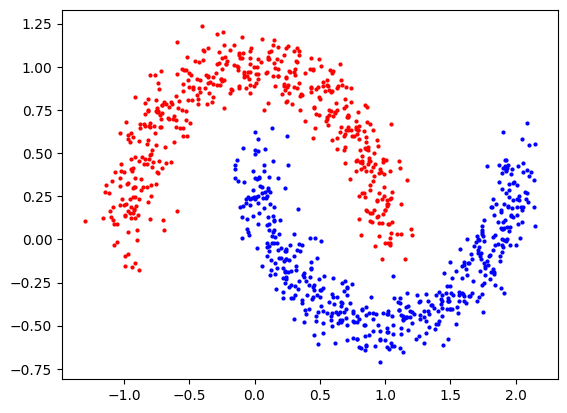

In [27]:
ds = PointsDataset("dataset2.txt")
for p in ds:
    x, y, c = p
    if c == 1:
        plt.scatter(x, y, c="b", s=4)
    else:
        plt.scatter(x, y, c="r", s=4)

plt.show()

In [6]:
class PolyModel(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.a = torch.nn.Parameter(torch.rand(1))
    self.b = torch.nn.Parameter(torch.rand(1))
    self.c = torch.nn.Parameter(torch.rand(1))
    self.d = torch.nn.Parameter(torch.rand(1))
    self.e = torch.nn.Parameter(torch.rand(1))
  
  def forward(self, x):
    return self.a*x.pow(4) + self.b*x.pow(3) + self.c*x.pow(2) + self.d*x + self.e

## My solution

In [52]:
from tqdm import trange

EPOCHS = 1000
ds = PointsDataset("dataset2.txt")
dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)

model = PolyModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in trange(EPOCHS):
    for batch in dl:
        x = batch[:, 0]
        y = batch[:, 1]
        c = batch[:, 2]
        
        y_model = model(x)
        
        predicted_above = y_model > y
        actual_above = c == 1

        predicted_below = y_model < y
        actual_below = c == 0

        errors = torch.abs(y_model - y)
        errors[predicted_above == actual_above] = 0
        errors[predicted_below == actual_below] = 0
        
        loss = torch.mean(errors)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

100%|██████████| 1000/1000 [00:11<00:00, 86.46it/s]


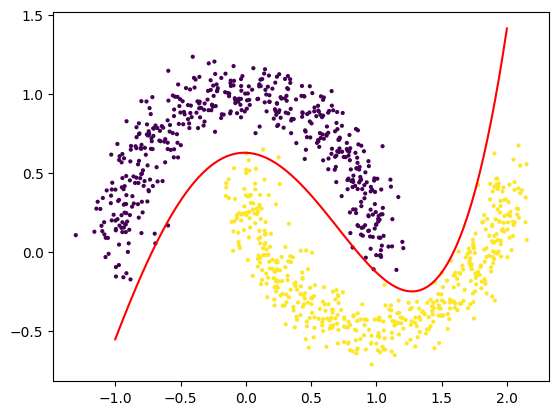

In [53]:
ds = PointsDataset("dataset2.txt")
xx = torch.linspace(-1, 2, 100)
yy = model(xx)

data = torch.stack(ds.data, dim=0)
plt.plot(xx, yy.detach(), c="r")
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=4)
plt.show()

## Solution that most of you done in class

In [15]:
from tqdm import trange

EPOCHS = 1000
ds = PointsDataset("dataset2.txt")
dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)

model = PolyModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

for epoch in trange(EPOCHS):
    for batch in dl:
        x = batch[:, 0]
        y = batch[:, 1]
        c = batch[:, 2]
        
        y_model = model(x)
        
        loss = None

        for i in range(0, x.shape[0]):
            if c[i] == 1 and y_model[i] < y[i]:
                elem_loss = y[i] - y_model[i]
            elif c[i] == 0 and y_model[i] > y[i]:
                elem_loss = y_model[i] - y[i]
            else:
                elem_loss = None
            
            if elem_loss is not None:
                if loss is None:
                    loss = elem_loss
                else:
                    loss += elem_loss
        
        optimizer.zero_grad()
        if loss is not None: loss.backward()
        optimizer.step()

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:32<00:00, 30.90it/s]


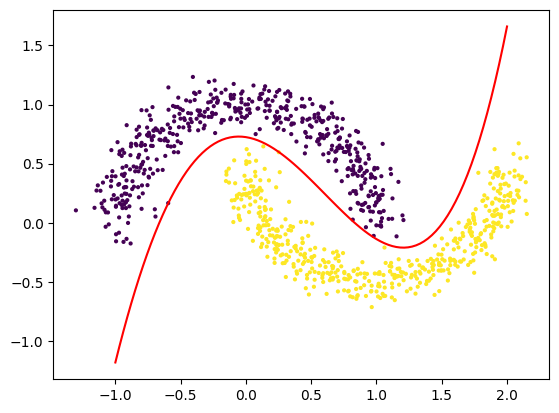

In [16]:
ds = PointsDataset("dataset2.txt")
xx = torch.linspace(-1, 2, 100)
yy = model(xx)

data = torch.stack(ds.data, dim=0)
plt.plot(xx, yy.detach(), c="r")
plt.scatter(data[:, 0], data[:, 1], c=data[:, 2], s=4)
plt.show()